In [29]:
import warnings
import pandas as pd
import numpy as np
import riskfolio as rp
from openbb_terminal.sdk import openbb
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns

In [4]:
start = '2013-02-13'
end = '2023-02-13'

symbols = ["SPY", "COST", "AVGO", "APD", "AMGN", "CVX", "AAPL", "DIS",
          "BAC", "GS", "SBUX", "COF", "ETN", "XOM", "HD", "MA",
          "QQQ", "IWM", "JNJ", "JPM", "MCD", "MRK", "MSFT", "NVDA", "NKE",
          "PEP", "PFE", "PG", "MO", "BUD", "SHW", "TSCO", "UNH", "VZ", "V", "WMT"]

data = openbb.economy.index(symbols, start_date=start, end_date=end)
data

,SPY,COST,AVGO,APD,AMGN,CVX,AAPL,DIS,BAC,GS,...,PFE,PG,MO,BUD,SHW,TSCO,UNH,VZ,V,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2013-02-13 00:00:00-05:00,126.366089,83.569176,26.767323,64.430946,65.928322,76.993675,14.405275,49.963749,10.341105,130.554306,...,17.901682,57.207516,19.707796,68.738289,50.024685,45.482632,49.074028,28.145346,36.090061,57.176144
2013-02-14 00:00:00-05:00,126.482338,83.889862,27.125034,64.365646,65.757576,77.113655,14.392321,49.891014,10.307117,131.745682,...,17.941465,57.371925,19.328154,72.242958,49.486488,45.769379,48.919678,28.025219,36.372204,56.719635
2013-02-15 00:00:00-05:00,126.332863,84.013199,26.744486,64.031799,64.896004,76.613831,14.193980,50.554653,10.222144,130.951462,...,18.093958,57.192574,19.481142,72.219604,50.402615,45.778194,49.151199,28.069487,36.840919,55.502277
2013-02-19 00:00:00-05:00,127.279724,83.791176,27.048929,64.372910,65.299614,77.253616,14.188738,50.663750,10.358100,134.043793,...,18.372427,57.820244,19.702141,72.499977,49.616493,45.632622,48.585251,28.132708,36.752304,55.069801
2013-02-20 00:00:00-05:00,125.693420,83.116898,26.386774,63.581856,65.703239,76.633827,13.845121,49.636478,10.026708,131.112000,...,18.279612,57.596073,19.770130,72.328644,48.174271,44.803257,47.341896,28.398232,36.241631,55.430199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06 00:00:00-05:00,409.829987,515.590027,601.299988,283.029999,243.850006,169.639999,151.498688,109.870003,36.369999,370.799988,...,43.759998,141.399994,46.959999,58.730000,243.029999,232.419998,475.239990,41.279999,228.991501,140.679993
2023-02-07 00:00:00-05:00,415.190002,516.530029,614.450012,285.070007,244.000000,174.089996,154.414230,111.629997,36.770000,374.399994,...,43.590000,140.020004,46.560001,58.419998,238.440002,232.729996,476.880005,40.549999,230.867828,140.979996
2023-02-08 00:00:00-05:00,410.649994,503.809998,601.710022,287.239990,240.199997,170.000000,151.688400,111.779999,36.500000,375.100006,...,43.980000,138.570007,46.500000,58.200001,235.509995,231.240005,483.220001,40.520000,229.750000,140.220001


In [3]:
returns = data.pct_change().dropna()
returns

,SPY,COST,AVGO,APD,AMGN,CVX,AAPL,DIS,BAC,GS,...,PFE,PG,MO,BUD,SHW,TSCO,UNH,VZ,V,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2013-02-14 00:00:00-05:00,0.000920,0.003837,0.013364,-0.001014,-0.002590,0.001558,-0.000899,-0.001455,-0.003287,0.009125,...,0.002222,0.002874,-0.019264,0.050986,-0.010759,0.006305,-0.003145,-0.004268,0.007818,-0.007985
2013-02-15 00:00:00-05:00,-0.001182,0.001470,-0.014029,-0.005187,-0.013102,-0.006482,-0.013781,0.013302,-0.008244,-0.006028,...,0.008500,-0.003126,0.007916,-0.000323,0.018513,0.000192,0.004732,0.001579,0.012887,-0.021463
2013-02-19 00:00:00-05:00,0.007494,-0.002642,0.011383,0.005327,0.006219,0.008350,-0.000370,0.002158,0.013300,0.023615,...,0.015390,0.010975,0.011344,0.003882,-0.015597,-0.003180,-0.011514,0.002252,-0.002405,-0.007792
2013-02-20 00:00:00-05:00,-0.012463,-0.008048,-0.024479,-0.012289,0.006181,-0.008023,-0.024218,-0.020276,-0.031993,-0.021872,...,-0.005052,-0.003877,0.003451,-0.002363,-0.029068,-0.018175,-0.025591,0.009438,-0.013895,0.006544
2013-02-21 00:00:00-05:00,-0.006079,-0.003858,-0.028844,-0.022144,0.005670,0.000000,-0.006216,-0.007875,-0.032203,-0.027709,...,-0.005803,-0.000519,0.008885,-0.008722,-0.018385,-0.004637,0.000543,0.004453,0.012997,0.015171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06 00:00:00-05:00,-0.006111,0.001535,0.006158,-0.006982,-0.005384,0.001121,-0.017929,-0.007587,-0.001647,0.002298,...,-0.006809,-0.008485,0.001066,-0.007772,0.005378,0.016888,0.006822,-0.005541,-0.002998,-0.007268
2023-02-07 00:00:00-05:00,0.013079,0.001823,0.021869,0.007208,0.000615,0.026232,0.019245,0.016019,0.010998,0.009709,...,-0.003885,-0.009759,-0.008518,-0.005278,-0.018887,0.001334,0.003451,-0.017684,0.008194,0.002133
2023-02-08 00:00:00-05:00,-0.010935,-0.024626,-0.020734,0.007612,-0.015574,-0.023494,-0.017653,0.001344,-0.007343,0.001870,...,0.008947,-0.010356,-0.001289,-0.003766,-0.012288,-0.006402,0.013295,-0.000740,-0.004842,-0.005391


In [27]:
# Use the `corr` function to calculate the correlation between stock returns
correlation = returns.corr()
correlation.head()

,SPY,COST,AVGO,APD,AMGN,CVX,AAPL,DIS,BAC,GS,...,PFE,PG,MO,BUD,SHW,TSCO,UNH,VZ,V,WMT
SPY,1.000000,0.608160,0.668049,0.693016,0.570142,0.628124,0.719935,0.673609,0.720519,0.750627,...,0.523975,0.565727,0.479139,0.547286,0.626597,0.522274,0.629448,0.475531,0.767353,0.453606
COST,0.608160,1.000000,0.377855,0.414306,0.359313,0.259594,0.463021,0.355641,0.319033,0.374683,...,0.337557,0.482419,0.318429,0.261684,0.398854,0.449113,0.390949,0.357311,0.426754,0.566400
AVGO,0.668049,0.377855,1.000000,0.439876,0.364004,0.396397,0.565675,0.416192,0.444839,0.478857,...,0.290153,0.291972,0.259449,0.373356,0.443967,0.358696,0.388557,0.233513,0.509627,0.233888
APD,0.693016,0.414306,0.439876,1.000000,0.420316,0.462721,0.432988,0.455892,0.519289,0.527112,...,0.391120,0.445554,0.377382,0.414861,0.519332,0.357681,0.463859,0.367115,0.551613,0.330849
AMGN,0.570142,0.359313,0.364004,0.420316,1.000000,0.307524,0.370575,0.330811,0.388915,0.391261,...,0.491405,0.420546,0.301813,0.292932,0.385790,0.317919,0.463935,0.344206,0.432141,0.328034


<AxesSubplot: >

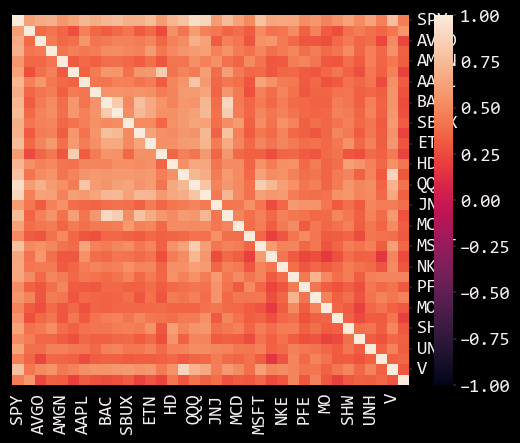

In [35]:
# Use the `heatmap` function from the Seaborn library to visualize the correlation table
sns.heatmap(correlation, vmin=-1, vmax=1)

In [15]:
#weight the portfolio (0.0285 = equal wt for 35 stocks)
#weight the portfolio
portfolio_weighted_returns = ((returns["COST"]*.0059) + (returns["AVGO"]*.0088) + (returns["APD"]*.0066) + (returns["AMGN"]*.0029) + (returns["CVX"]*.0191) + 
        (returns["AAPL"]*.0125) + (returns["DIS"]*.1366) + (returns["BAC"]*.1109) + (returns["GS"]*.0044) + (returns["SBUX"]*.0389) + 
        (returns["COF"]*.0132) + (returns["ETN"]*.0264) + (returns["XOM"]*.0345) + (returns["HD"]*.0066) + (returns["MA"]*.0125) + 
        (returns["QQQ"]*.0800) + (returns["IWM"]*.0352) + (returns["JNJ"]*.0184) + (returns["JPM"]*.0228) + (returns["MCD"]*.0330) + 
        (returns["MRK"]*.0081) + (returns["MSFT"]*.0213) + (returns["NVDA"]*.1043) + (returns["NKE"]*.0264) + (returns["PEP"]*.0110) + 
        (returns["PFE"]*.0404) + (returns["PG"]*.0125) + (returns["MO"]*.0162) + (returns["BUD"]*.0360) + (returns["SHW"]*.0073) + 
        (returns["TSCO"]*.0492) + (returns["UNH"]*.0066) + (returns["VZ"]*.0235) + (returns["V"]*.0081) + (returns["WMT"]*.0132)
        
            )
portfolio_weighted_returns.head()

Date
2013-02-14 00:00:00-05:00    0.004757
2013-02-15 00:00:00-05:00   -0.000332
2013-02-19 00:00:00-05:00    0.003672
2013-02-20 00:00:00-05:00   -0.014489
2013-02-21 00:00:00-05:00   -0.008416
dtype: float64

<AxesSubplot: title={'left': 'Mike Portfolio'}, xlabel='Date'>

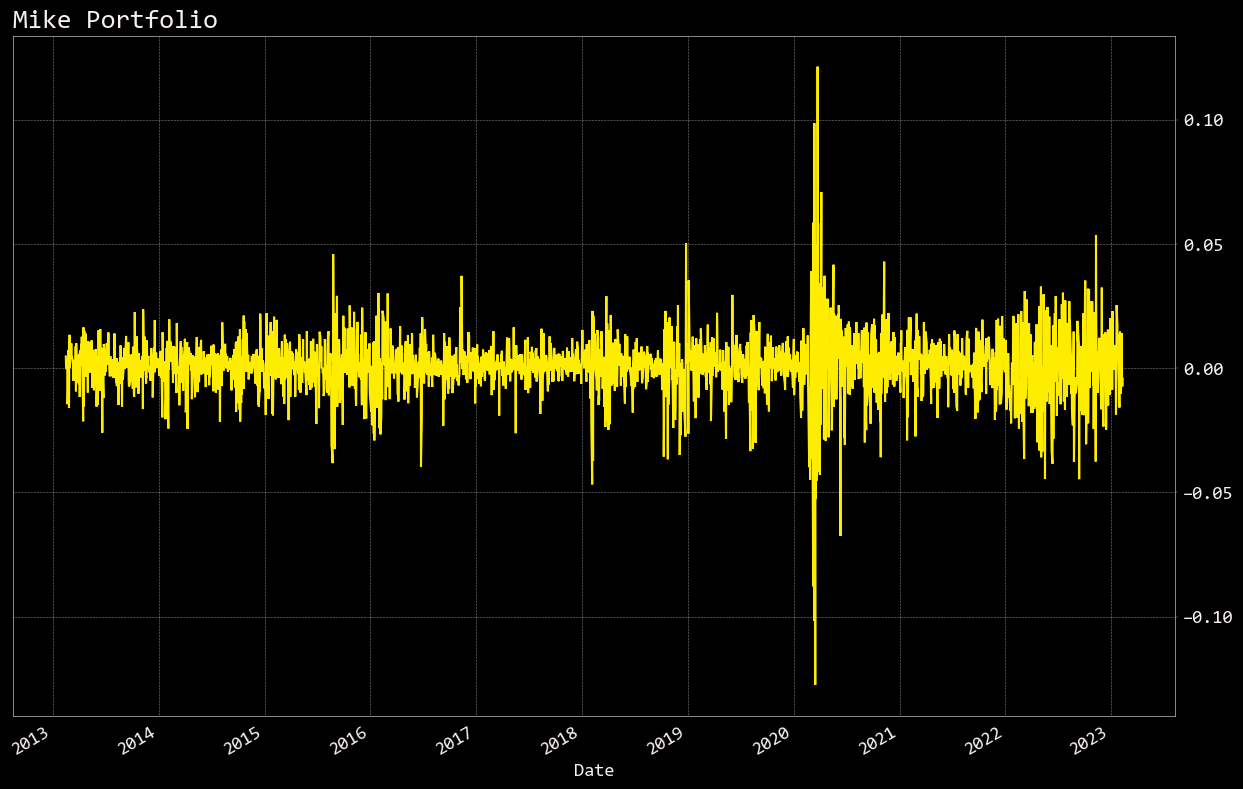

In [23]:
portfolio_weighted_returns.plot(
    title = "Mike Portfolio",
    figsize = (15, 10)
)

<AxesSubplot: title={'left': 'Mike Portfolio'}, xlabel='Date', ylabel='Cum Returns'>

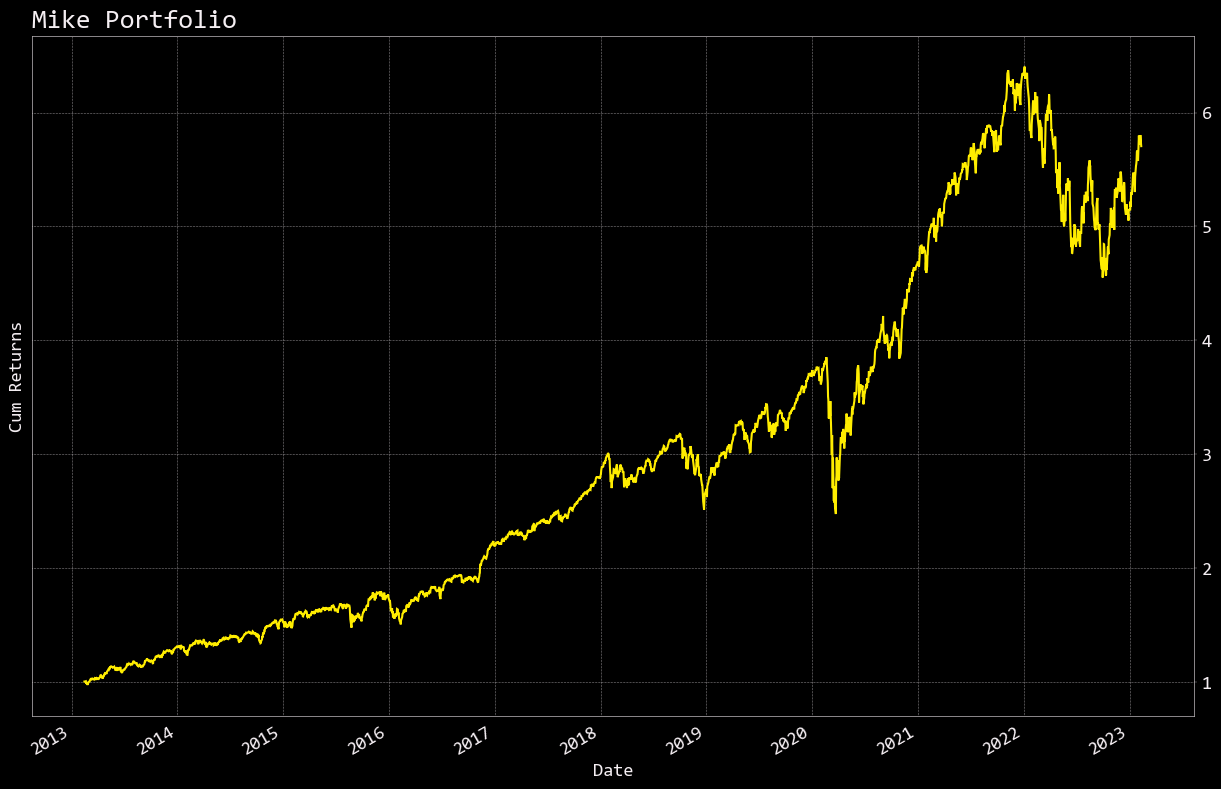

In [32]:
cum_returns.plot(
    title = "Mike Portfolio",
    figsize = (15, 10),
    ylabel = "Cum Returns"
)

<AxesSubplot: title={'left': 'Mike Portfolio'}, xlabel='Date'>

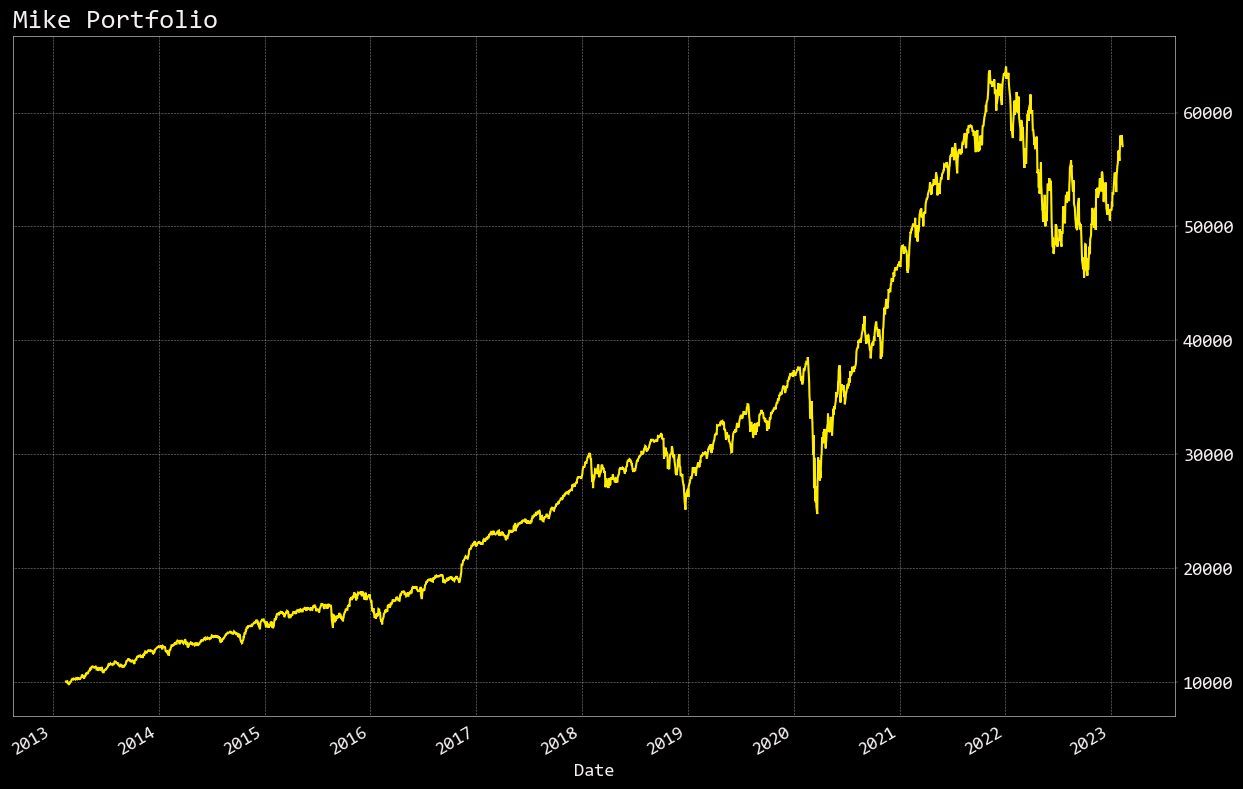

In [25]:
#cumulative returns for 10k investment
initial_investment = 10000
cum_returns = (1 + portfolio_weighted_returns).cumprod()
(initial_investment * cum_returns).plot(
    title = "Mike Portfolio",
    figsize = (15, 10)
)